In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
empty = cv2.imread('Empty.jpg', cv2.IMREAD_COLOR)
empty = cv2.cvtColor(empty, cv2.COLOR_BGR2RGB)

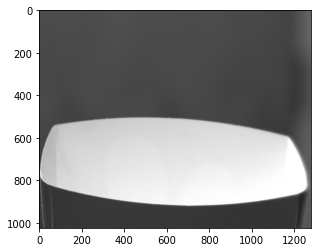

In [3]:
plt.imshow(empty)

In [4]:
fill_25 = cv2.imread('Partially_Full_1.jpg', cv2.IMREAD_COLOR)
fill_25 = cv2.cvtColor(fill_25, cv2.COLOR_BGR2RGB)
fill_25_gray = cv2.cvtColor(fill_25, cv2.COLOR_RGB2GRAY)

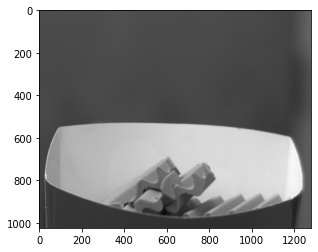

In [5]:
plt.imshow(fill_25)

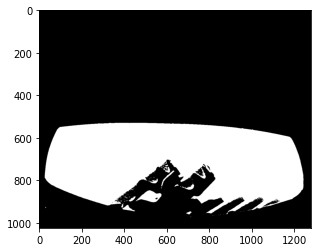

In [6]:
ret, thresh = cv2.threshold(fill_25_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh, 'gray')

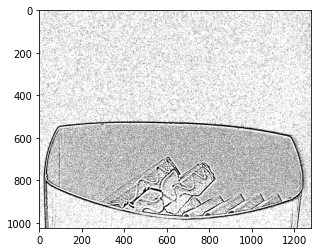

In [7]:
th3 = cv2.adaptiveThreshold(fill_25_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
plt.imshow(th3, 'gray')

In [8]:
contours, hierarchy = cv2.findContours(th3.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
dil = th3.copy()

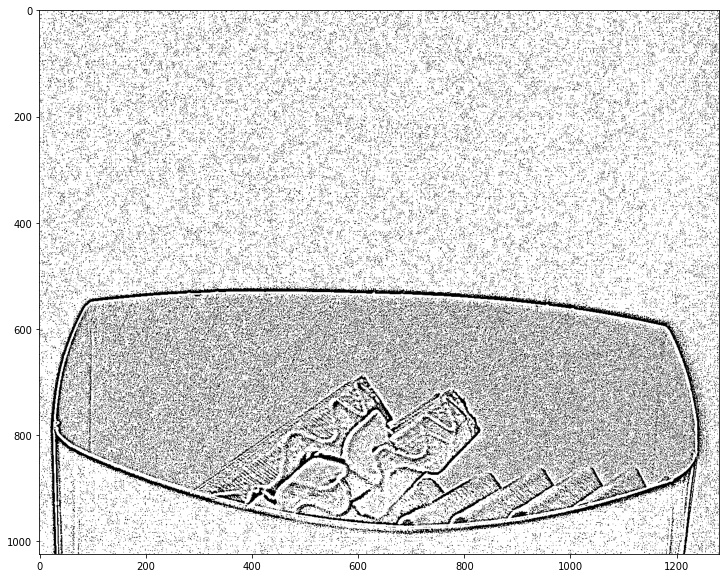

In [9]:
cnt_image = cv2.drawContours(dil, cnt, -1, (0,255,0), 3)
plt.figure( figsize=(17,10))
plt.imshow(cnt_image, 'gray')

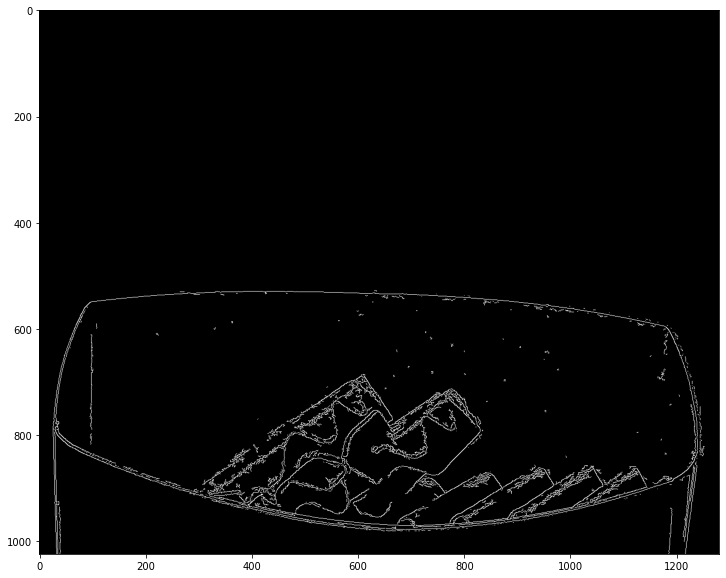

In [10]:
edges = cv2.Canny(fill_25_gray,100,200, L2gradient= True,  apertureSize = -1)
plt.figure( figsize=(17,10))
plt.imshow(edges, 'gray')

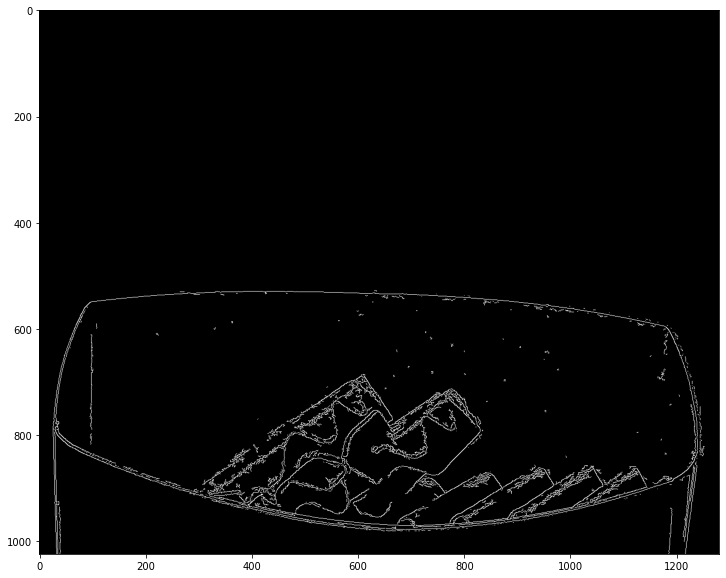

In [11]:
kernel = np.ones((1,1),np.uint8)
erosion = cv2.erode(edges,kernel,iterations = 1)
plt.figure( figsize=(17,10))
plt.imshow(erosion, 'gray')

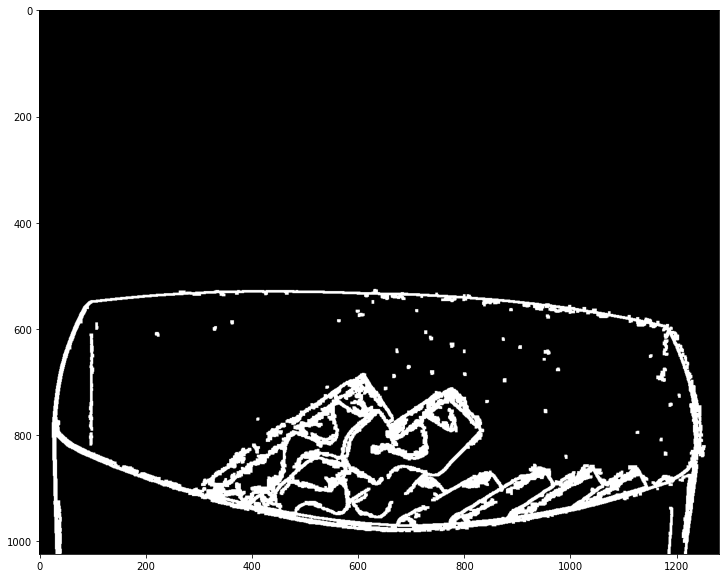

In [12]:
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(edges,kernel,iterations = 2)
plt.figure( figsize=(17,10))
plt.imshow(dilation, 'gray')

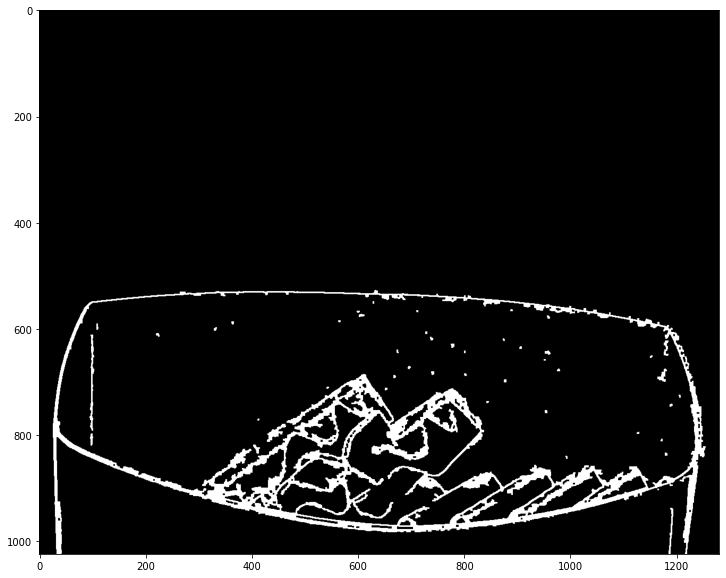

In [13]:
kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(dilation,kernel,iterations = 2)
plt.figure( figsize=(17,10))
plt.imshow(erosion, 'gray')

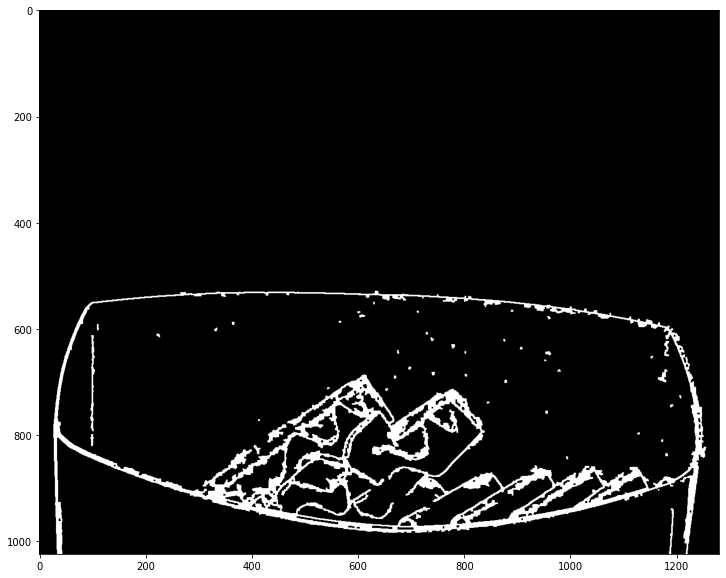

In [14]:
opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
plt.figure( figsize=(17,10))
plt.imshow(opening, 'gray')

# Third Image

In [15]:
fill_50 = cv2.imread('Partially_Full_2.jpg', cv2.IMREAD_COLOR)
fill_50 = cv2.cvtColor(fill_50, cv2.COLOR_BGR2RGB)
fill_50_gray = cv2.cvtColor(fill_50, cv2.COLOR_RGB2GRAY)

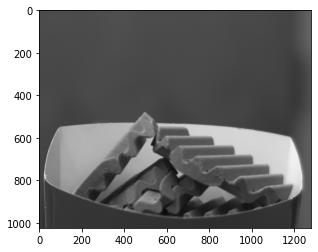

In [16]:
plt.imshow(fill_50)

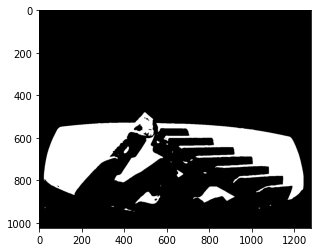

In [17]:
blur = cv2.GaussianBlur(fill_50_gray,(5,5),0)
# ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh, 'gray')

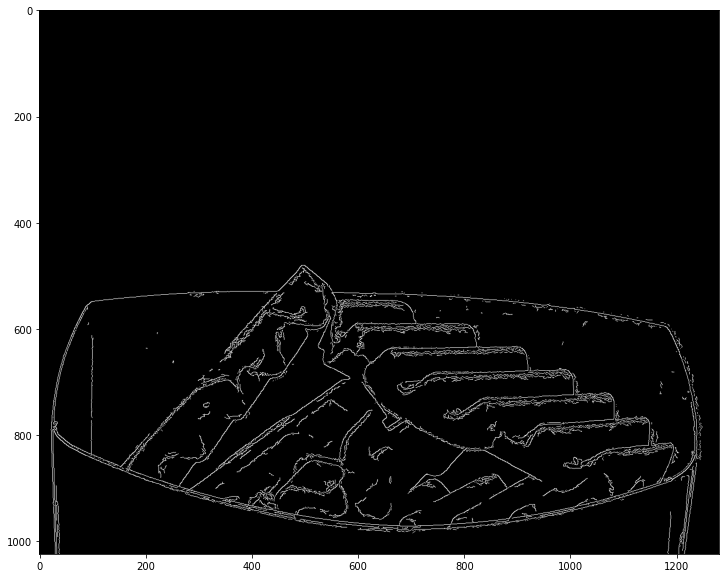

In [18]:
edges_50 = cv2.Canny(fill_50_gray,100,200, L2gradient= True,  apertureSize = -1)
plt.figure( figsize=(17,10))
plt.imshow(edges_50, 'gray')

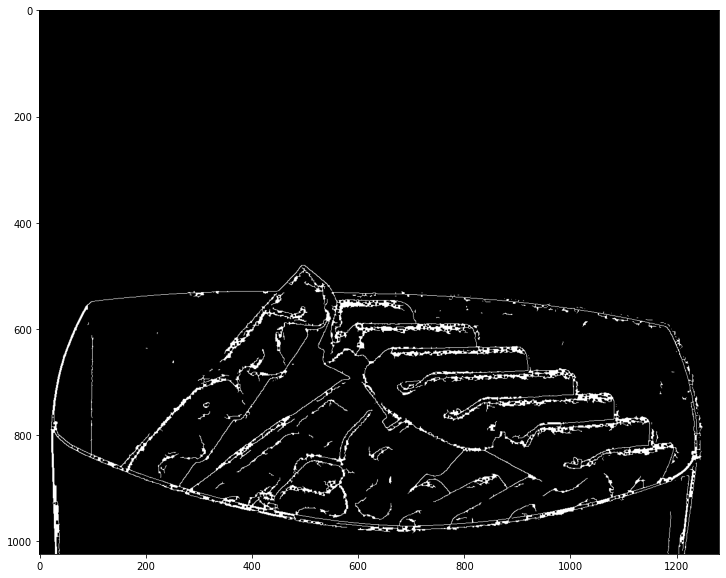

In [19]:
kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(edges_50, cv2.MORPH_CLOSE, kernel)
plt.figure( figsize=(17,10))
plt.imshow(closing, 'gray')

32


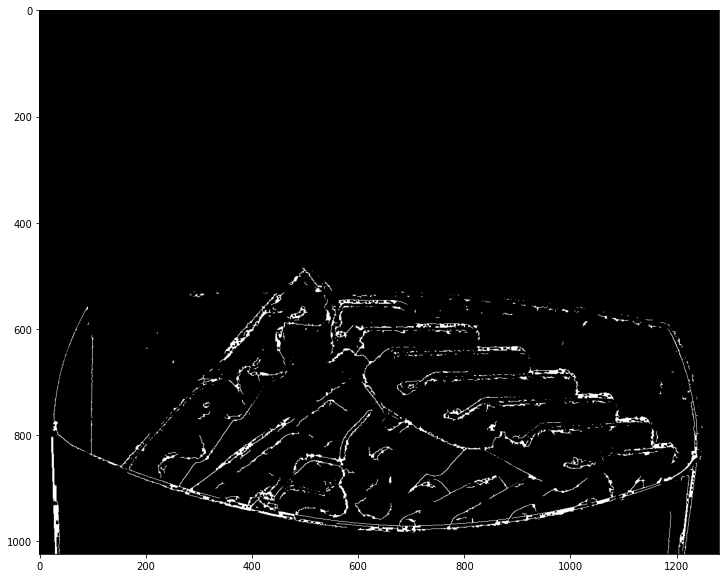

In [20]:
# ret, thresh = cv2.threshold(closing, 90, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]
print(len(contours))
cnt_img = cv2.drawContours(closing, contours, -1, (0,255,0), 3)
plt.figure( figsize=(17,10))
plt.imshow(cnt_img, 'gray')

290


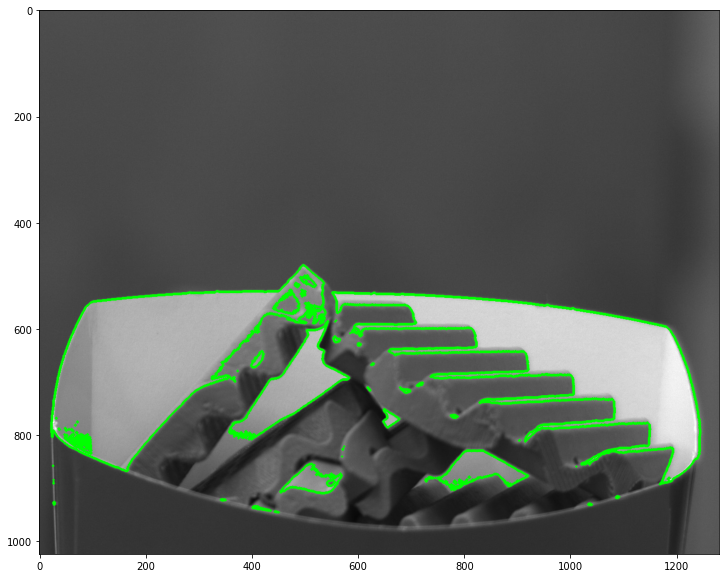

In [21]:
ret, thresh = cv2.threshold(fill_50_gray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[1]
print(len(contours))
cnt_img = cv2.drawContours(fill_50.copy(), contours, -1, (0,255,0), 3)
plt.figure( figsize=(17,10))
plt.imshow(cnt_img, 'gray')

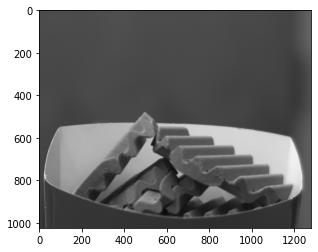

In [22]:
plt.imshow(fill_50)

In [23]:
area = cv2.contourArea(contours[1])
area

3.5

In [25]:
def calculate_max(contours): 
    max = []
    maxers = []
    for i in range(0, len(contours)):
        maxers.append(contours[i].shape[0])
#     print(max.shape)
#     print("maxers : ",sorted(maxers, reverse=True))
    maxer = sorted(maxers, reverse=True)
    top_5 = maxer[:3]
    print(top_5)
    for i in range(0, len(contours)):
        for j in top_5:
            if contours[i].shape[0] == j:
                max.append(contours[i])
    return max

In [26]:
def calculate_area(contours, name):
    area_list = []
    for i in range(0, len(contours)):
        area = cv2.contourArea(contours[i])
    #     print(area)
        area_list.append(area)
    print(f"{name}",sum(area_list))
    print(len(area_list))
#     area = max(area_list)
    area = sum(area_list)
    return area

[960, 7, 6]
Empty.jpg 436125.0
3
[2634, 145, 127]
Partially_Full_1.jpg 378046.5
3
[1552, 902, 467]
Partially_Full_2.jpg 190797.0
3
[1545, 624, 507]
Partially_Full_3.jpg 85712.5
3
[1154, 498, 399]
Partially_Full_4.jpg 35683.0
3


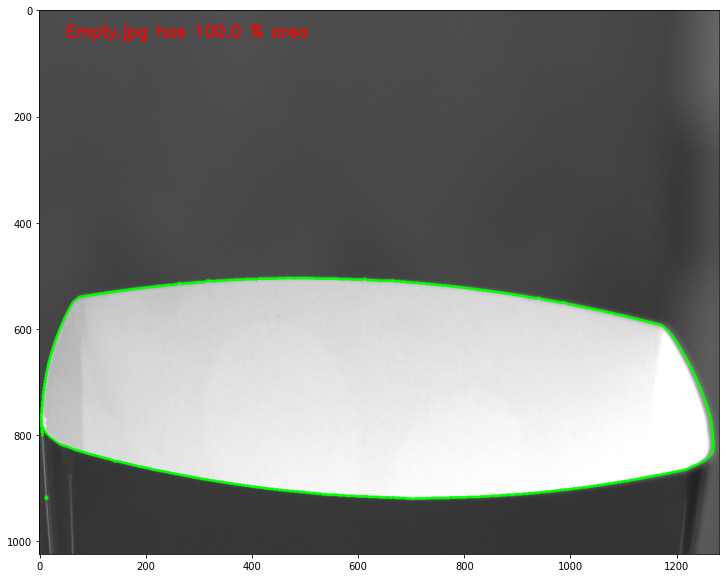

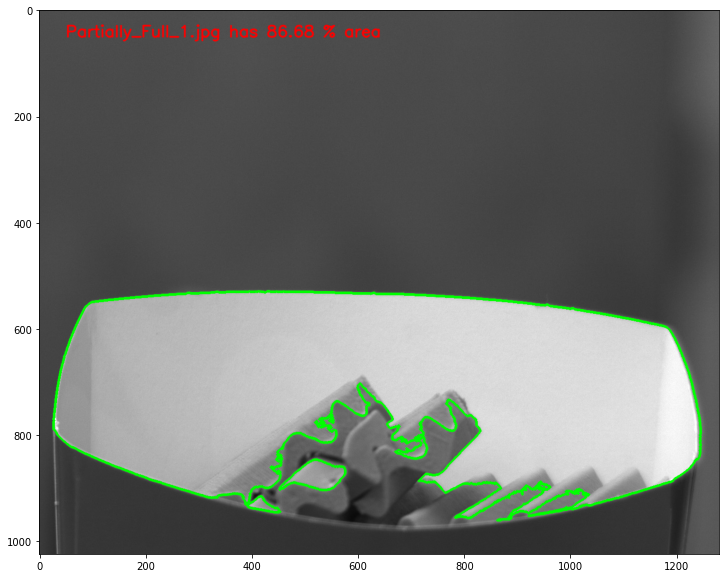

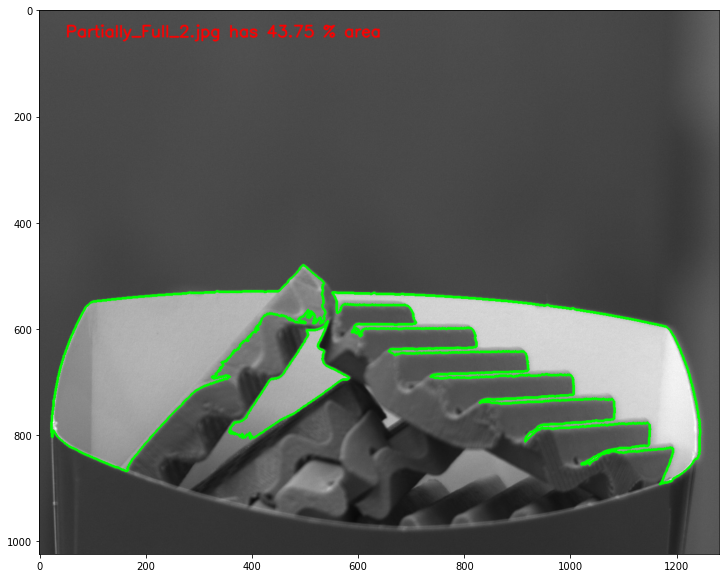

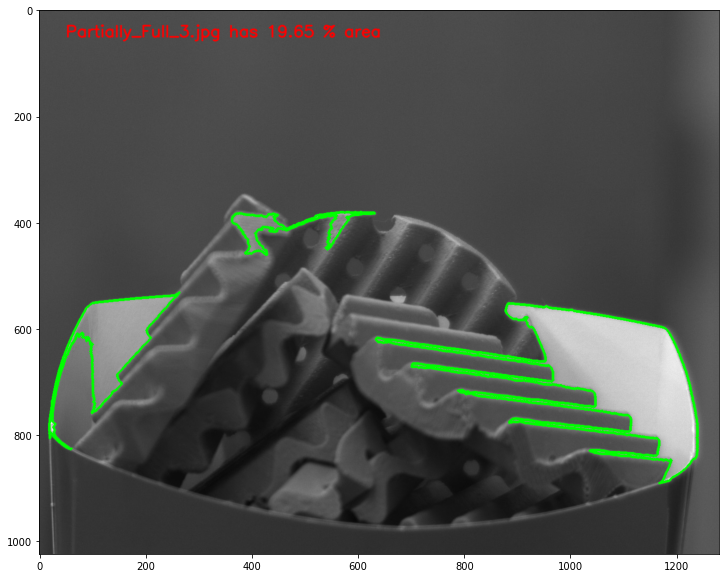

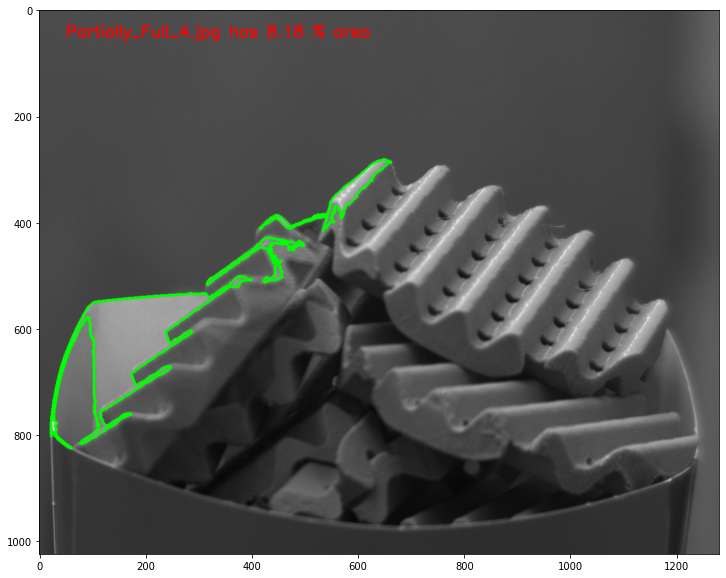

In [27]:
images = ['Empty.jpg', 'Partially_Full_1.jpg', 'Partially_Full_2.jpg', 'Partially_Full_3.jpg', 'Partially_Full_4.jpg']
font = cv2.FONT_HERSHEY_SIMPLEX
org = (50, 50)
empty_area = 436125.0
for i in range(0, len(images)):
    img = cv2.imread(images[i], 1)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = calculate_max(contours)
#     print(len(contours))
    cnt_img = cv2.drawContours(img.copy(), cnt, -1, (0,255,0), 3)
    area = calculate_area(cnt, images[i])
    if area:
        area_img = (area / empty_area) * 100
        area_img = float("{:.2f}".format(area_img))
#         area_print = 
        cv2.putText(cnt_img, f"{images[i]} has {area_img} % area", org, font, 1, (255,0,0), 2, cv2.LINE_AA)
#         if area > 400000:
#             image = cv2.putText(cnt_img, "Empty", org, font, 1, (255,0,0), 2, cv2.LINE_AA)
#         elif area > 300000:
#             image = cv2.putText(cnt_img, "quater full", org, font, 1, (255,0,0), 2, cv2.LINE_AA)
#         elif area > 200000:
#             image = cv2.putText(cnt_img, "Half Full", org, font, 1, (255,0,0), 2, cv2.LINE_AA)
#         else:
#             image = cv2.putText(cnt_img, "Full", org, font, 1, (255,0,0), 2, cv2.LINE_AA)
    plt.figure( figsize=(17,10))
    plt.imshow(cnt_img, 'gray')